In [1]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# import ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report, mean_squared_error, mean_absolute_error

# from sklearn.feature_selection import RFE

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
df = pd.read_csv('admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
# Returns number of rows and columns of the dataset
df.shape

(500, 9)

In [5]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Returns the first x number of rows when tail(num). Without a number it returns 5
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [7]:
# Returns an object with all of the column headers
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [10]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [11]:
# Returns true for a column having null values, else false
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
# Renaming the columns with appropriate names
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability','University Rating':'Rating'})
df.head()

,Serial No.,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


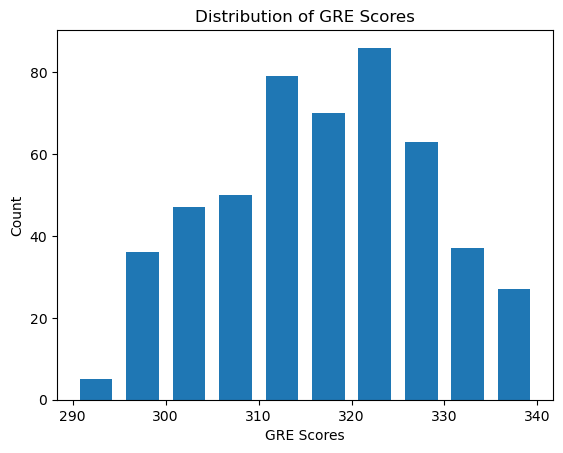

In [13]:
# Visualizing the feature GRE
fig = plt.hist(df['GRE'], rwidth=0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

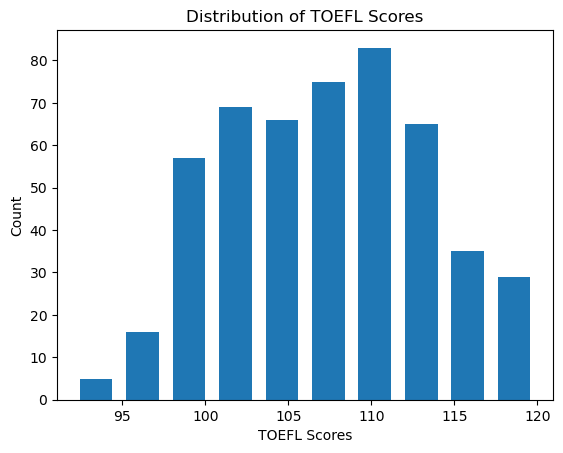

In [14]:
# Visualizing the feature TOEFL
fig = plt.hist(df['TOEFL'], rwidth=0.7)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

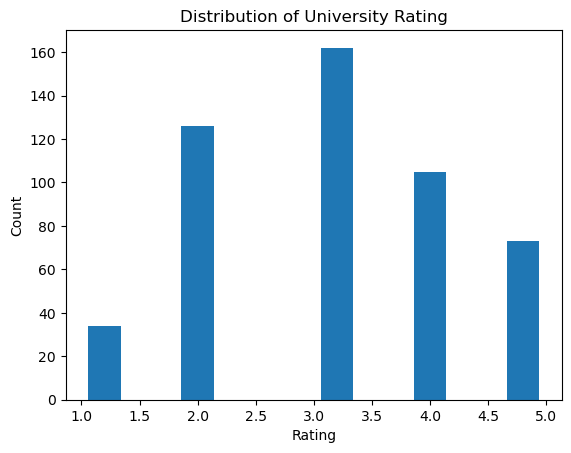

In [15]:
# Visualizing the feature TOEFL
fig = plt.hist(df['Rating'], rwidth=0.7)
plt.title('Distribution of University Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

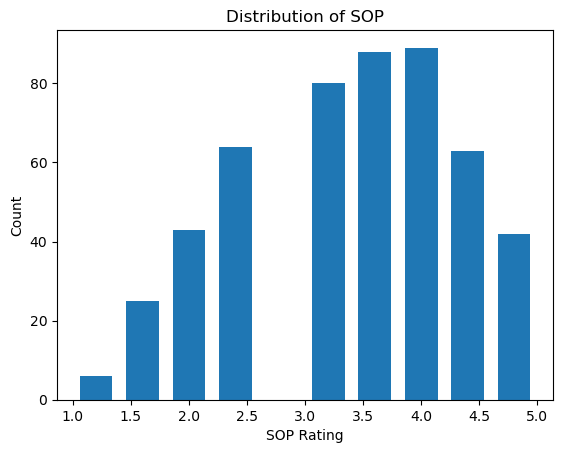

In [16]:
# Visualizing the feature TOEFL
fig = plt.hist(df['SOP'], rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

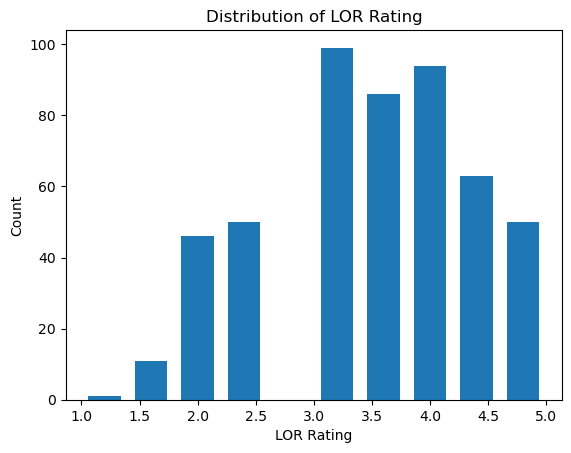

In [17]:
# Visualizing the feature TOEFL
fig = plt.hist(df['LOR'], rwidth=0.7)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

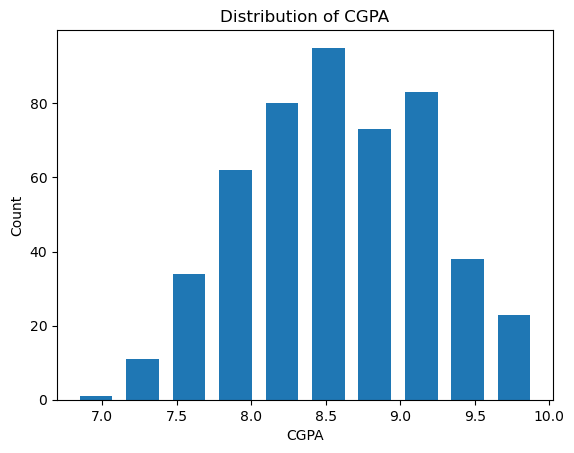

In [18]:
# Visualizing the feature TOEFL
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

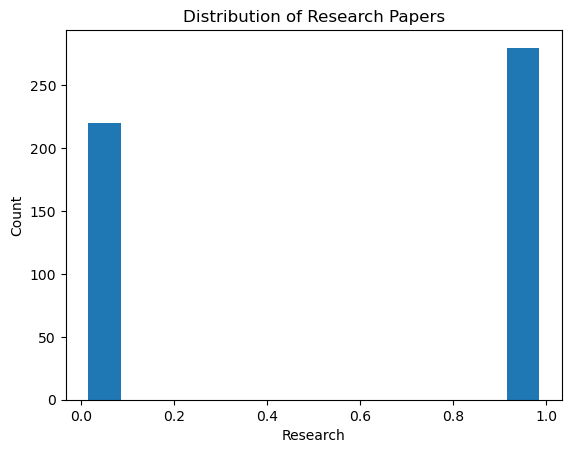

In [19]:
# Visualizing the feature TOEFL
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

In [20]:
# Removing the serial no, column
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
corr = df.corr(method='pearson',min_periods=1).round(2)
corr.style.background_gradient(cmap='coolwarm')

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Probability
GRE,1.000000,0.830000,0.640000,0.610000,0.520000,0.830000,0.560000,0.810000
TOEFL,0.830000,1.000000,0.650000,0.640000,0.540000,0.810000,0.470000,0.790000
Rating,0.640000,0.650000,1.000000,0.730000,0.610000,0.710000,0.430000,0.690000
SOP,0.610000,0.640000,0.730000,1.000000,0.660000,0.710000,0.410000,0.680000
LOR,0.520000,0.540000,0.610000,0.660000,1.000000,0.640000,0.370000,0.650000
CGPA,0.830000,0.810000,0.710000,0.710000,0.640000,1.000000,0.500000,0.880000
Research,0.560000,0.470000,0.430000,0.410000,0.370000,0.500000,1.000000,0.550000
Probability,0.810000,0.790000,0.690000,0.680000,0.650000,0.880000,0.550000,1.000000


In [22]:
df.drop(['LOR','Research','SOP'], axis='columns', inplace=True)
df.head()

,GRE,TOEFL,Rating,CGPA,Probability
0,337,118,4,9.65,0.92
1,324,107,4,8.87,0.76
2,316,104,3,8.00,0.72
3,322,110,3,8.67,0.80
4,314,103,2,8.21,0.65


In [23]:
# Splitting the dataset in features and label
X = df.drop('Probability', axis='columns')
y = df['Probability']

In [24]:
X

,GRE,TOEFL,Rating,CGPA
0,337,118,4,9.65
1,324,107,4,8.87
2,316,104,3,8.00
3,322,110,3,8.67
4,314,103,2,8.21
...,...,...,...,...
495,332,108,5,9.02
496,337,117,5,9.87
497,330,120,5,9.56
498,312,103,4,8.43


In [25]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Probability, Length: 500, dtype: float64

In [26]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

400 100


In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Linear Regression: ', r2_score(y_test, y_pred))

Linear Regression:  0.8046689547374029


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print('Random Forest: ', r2_score(y_test, y_pred))

Random Forest:  0.7959697694757326


In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print('Decision Tree: ', r2_score(y_test, y_pred))

Decision Tree:  0.7959697694757326


In [30]:
preds = lr.predict([[324,107,1,8.87]]).round(2)
preds

array([0.75])

In [31]:
# Prediction 1
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(lr.predict([[322,110,1,8.67]])[0]*100, 3)))

Chance of getting into UCLA is 72.525%


In [32]:
# Prediction 2
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(lr.predict([[314,103,1,8.2]])[0]*100, 3)))

Chance of getting into UCLA is 62.522%


In [33]:
import pickle

# save the model
import pickle
pickle.dump(lr, open("1024.pkl", "wb"))